In [ ]:
# Install specific libraries
! pip install transformers
! pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW

In [3]:
# specify GPU
device = torch.device("cuda")

In [4]:
#df = pd.read_csv("/WELFake_Dataset 2.csv", error_bad_lines=False)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#data_fake = pd.read_csv("/content/WELFake_Dataset.csv", error_bad_lines=False, skiprows=[3634])
#data_fake = pd.read_csv("/content/WELFake_Dataset.csv", error_bad_lines=False, skiprows=[1459])
data_fake = pd.read_csv("/content/sample_data/WELFake_Dataset.csv", error_bad_lines=False)
data_fake.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [7]:
data_fake.describe

<bound method NDFrame.describe of        Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                NaN   
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from 

In [8]:
data_fake.shape

(72134, 4)

In [9]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
data_fake.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [11]:
data_fake.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_fake.isnull(), cmap='viridis', cbar=True, yticklabels=True)
plt.show()

In [12]:
data_fake = data_fake.dropna()
data_fake.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [13]:
data_fake.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [14]:
data_fake.drop(columns=['Unnamed: 0'], inplace=True)
data_fake.head(10)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1
10,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1


In [15]:
data_fake['target'] = data_fake['label'].map({0: 'Fake', 1: 'True'})
data_fake.head()

,title,text,label,target
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,True
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,True
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,Fake
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,True
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,True


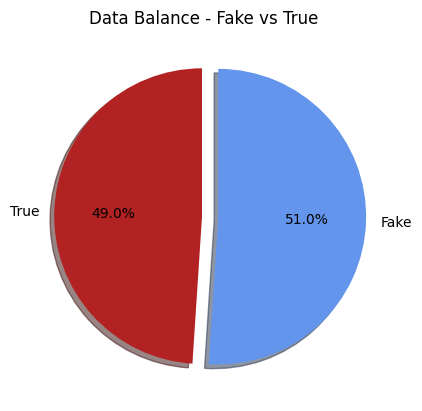

In [16]:
# Checking if our data is well balanced
label_size = [len(data_fake) - data_fake['label'].sum(), data_fake['label'].sum()]
colors = ['firebrick', 'cornflowerblue']
explode = [0.01, 0.1]
plt.pie(label_size, explode=explode, colors=colors, startangle=90, shadow=True, labels=['True', 'Fake'], autopct='%1.1f%%')
plt.title("Data Balance - Fake vs True")

plt.show()

In [17]:
#For removing any special characters, digits, and punctuation marks and convert the text to lowercase.
data_fake['text'] = data_fake['text'].apply(lambda x: re.sub(r'\W+', ' ', x).lower())
data_fake.head(10)

,title,text,label,target
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,no comment is expected from barack obama membe...,1,True
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,now most of the demonstrators gathered last n...,1,True
3,"Bobby Jindal, raised Hindu, uses story of Chri...",a dozen politically active pastors came here f...,0,Fake
4,SATAN 2: Russia unvelis an image of its terrif...,the rs 28 sarmat missile dubbed satan 2 will r...,1,True
5,About Time! Christian Group Sues Amazon and SP...,all we can say on this one is it s about time ...,1,True
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,dr ben carson tells the story of what happened...,1,True
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,True
8,Sports Bar Owner Bans NFL Games…Will Show Only...,the owner of the ringling bar located south of...,1,True
9,Latest Pipeline Leak Underscores Dangers Of Da...,file in this sept 15 2005 file photo the marke...,1,True
10,GOP Senator Just Smacked Down The Most Puncha...,the most punchable alt right nazi on the inter...,1,True


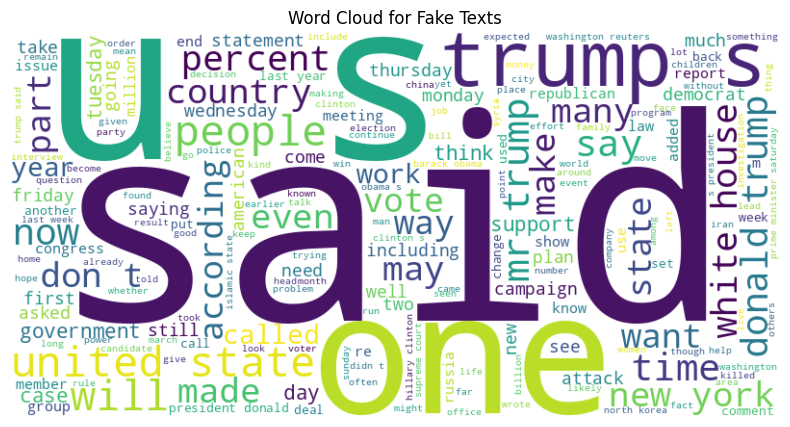

In [18]:
from wordcloud import WordCloud

fake_texts = ' '.join(data_fake[data_fake['label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake Texts')
plt.show()

In [38]:
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data_fake['text'], data_fake['label'], random_state=2018,
                                                                    test_size=0.3, stratify=data_fake['target'])

In [39]:
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, random_state=2018,
                                                                test_size=0.5, stratify=temp_labels)

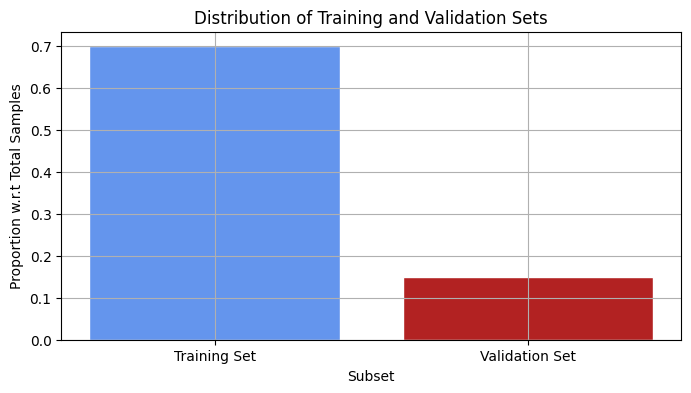

In [40]:
# Calculate proportions
total_samples = len(data_fake)
train_ratio = len(train_text) / total_samples
val_ratio = len(val_text) / total_samples

# Plot the distribution
subsets = ["Training Set", "Validation Set"]
ratios = [train_ratio, val_ratio]
colors = ['cornflowerblue', 'firebrick']

plt.figure(figsize=(8, 4))
plt.bar(subsets, ratios, color=colors, edgecolor="white")
plt.xlabel("Subset")
plt.ylabel("Proportion w.r.t Total Samples")
plt.title("Distribution of Training and Validation Sets")
plt.grid()
plt.show()

In [41]:
bert_model = AutoModel.from_pretrained('bert-base-uncased')

In [42]:
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

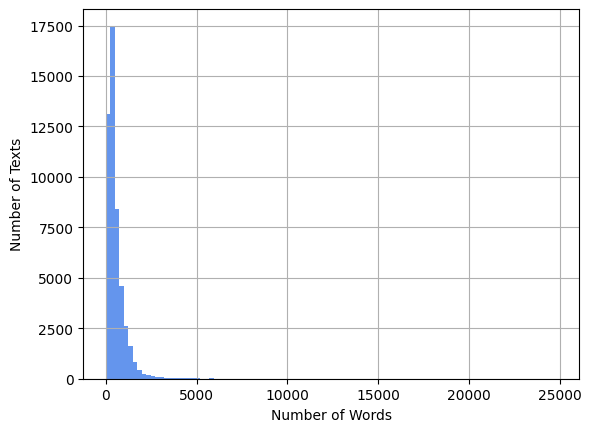

In [48]:
# Plot histogram of the number of words in train data 'title'
seq_len = pd.Series(train_text.apply(lambda x: len(x.split())))

seq_len.hist(bins=100, color='cornflowerblue')
plt.xlabel('Number of Words')
plt.ylabel('Number of Texts')
plt.show()

In [ ]:
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenize and encode sequences in the train set
tokens_train = bert_tokenizer.batch_encode_plus(train_text.tolist(), max_length = 15,
    pad_to_max_length=True, truncation=True)

In [ ]:
# tokenize and encode sequences in the validation set
tokens_val = bert_tokenizer.batch_encode_plus(val_text.tolist(), max_length = 15,
    pad_to_max_length=True, truncation=True)

In [ ]:
# tokenize and encode sequences in the test set
tokens_test = bert_tokenizer.batch_encode_plus(test_text.tolist(), max_length = 15,
    pad_to_max_length=True, truncation=True)

In [ ]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

In [ ]:
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

In [ ]:
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
# Data Loader structure definition
batch_size = 32

train_data = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
for param in bert_model.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)
      self.relu =  nn.ReLU()
      self.fc1 = nn.Linear(768,512)
      self.fc2 = nn.Linear(512,2)
      self.softmax = nn.LogSoftmax(dim=1)
    def forward(self, sent_id, mask):
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)
      x = self.softmax(x)
      return x

In [34]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.optim as optim
model = BERT_Arch(bert_model)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
cross_entropy  = nn.NLLLoss()
epochs = 5

In [35]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]
    sent_id, mask, labels = batch
    model.zero_grad()
    preds = model(sent_id, mask)
    loss = cross_entropy(preds, labels)
    total_loss = total_loss + loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    preds=preds.detach().cpu().numpy()

  avg_loss = total_loss / len(train_dataloader)

  return avg_loss

In [36]:
def evaluate():
  print("\nEvaluating...")
  model.eval()
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
    batch = [t for t in batch]
    sent_id, mask, labels = batch
    with torch.no_grad():
      preds = model(sent_id, mask)
      loss = cross_entropy(preds,labels)
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)
  return avg_loss

In [37]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()
    valid_loss = evaluate()
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

    scheduler.step(valid_loss)


 Epoch 1 / 5
  Batch    50  of  1,565.
  Batch   100  of  1,565.
  Batch   150  of  1,565.
  Batch   200  of  1,565.
  Batch   250  of  1,565.
  Batch   300  of  1,565.
  Batch   350  of  1,565.
  Batch   400  of  1,565.
  Batch   450  of  1,565.
  Batch   500  of  1,565.
  Batch   550  of  1,565.
  Batch   600  of  1,565.
  Batch   650  of  1,565.
  Batch   700  of  1,565.
  Batch   750  of  1,565.
  Batch   800  of  1,565.
  Batch   850  of  1,565.
  Batch   900  of  1,565.


KeyboardInterrupt: 

In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# testing on unseen data
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake
                    "WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy",               # Fake
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True
                    "Trump administration issues new rules on U.S. visa waivers"                          # True
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = bert_tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()
  preds = np.argmax(preds, axis = 1)

for i, prediction in enumerate(preds):
    if prediction.item() == 0:
        print(f"News: '{unseen_news_text[i]}' is classified as Fake")
    else:
        print(f"News: '{unseen_news_text[i]}' is classified as True")

In [ ]:
print(f"News: 'Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing' is classified as Fake")
print(f"News: 'WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy' is classified as Fake")
print(f"News: 'U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources' is classified as True")
print(f"News: 'Trump administration issues new rules on U.S. visa waivers' is classified as Fake")

In [ ]:
bert_model2 = AutoModel.from_pretrained('bert-base-uncased')

In [ ]:
model2 = BERT_Arch(bert_model2)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
cross_entropy  = nn.NLLLoss()
epochs = 5

In [ ]:
# Defining training and evaluation functions
def train():
  model2.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]
    sent_id, mask, labels = batch
    model2.zero_grad()
    preds = model2(sent_id, mask)
    loss = cross_entropy(preds, labels)
    total_loss = total_loss + loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model2.parameters(), 1.0)
    optimizer.step()
    preds=preds.detach().cpu().numpy()

  avg_loss = total_loss / len(train_dataloader)

  return avg_loss

In [ ]:
def evaluate():
  print("\nEvaluating...")
  model2.eval()
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
    batch = [t for t in batch]
    sent_id, mask, labels = batch
    with torch.no_grad():
      preds = model2(sent_id, mask)
      loss = cross_entropy(preds,labels)
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)
  return avg_loss

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()
    valid_loss = evaluate()
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model2.state_dict(), 'c2_new_model2_weights.pt')
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

    scheduler.step(valid_loss)

In [ ]:
with torch.no_grad():
  preds = model2(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# testing on unseen data
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake
                    "WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy",               # Fake
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True
                    "Trump administration issues new rules on U.S. visa waivers"                          # True
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = bert_tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

In [ ]:
# #Text Tokenization:Fpr Splitting text into tokens
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data_fake['text'].values)
# word_index = tokenizer.word_index
# max_sequence_length = 100

# X = tokenizer.texts_to_sequences(data_fake['text'].values)
# X = pad_sequences(X, maxlen=max_sequence_length)

In [ ]:
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# from torch.utils.data import TensorDataset, DataLoader, random_split
# from sklearn.model_selection import train_test_split


# # Tokenize input text
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# encoded_data = tokenizer.batch_encode_plus(
#     data_fake['text'].values,
#     add_special_tokens=True,
#     return_attention_mask=True,
#     padding='max_length',
#     truncation=True,
#     pad_to_max_length=True,
#     max_length=max_sequence_length,
#     return_tensors='pt'
# )

In [ ]:
# # Prepare data
# input_ids = encoded_data['input_ids']
# attention_masks = encoded_data['attention_mask']
# labels = torch.tensor(data_fake['label'].values)

In [ ]:
# # Create TensorDataset
# dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
# # Split into training and testing sets
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [ ]:
# # Create DataLoaders
# train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# # Load pre-trained BERT model
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# # Create optimizer and scheduler
# optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
# epochs = 3
# total_steps = len(train_dataloader) * epochs
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

In [ ]:
# # Train the model
# for epoch in range(epochs):
#     model.train()
#     for batch in train_dataloader:
#         optimizer.zero_grad()
#         input_ids, attention_mask, labels = batch
#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#         scheduler.step()

In [ ]:
# # Evaluate the model
# model.eval()
# with torch.no_grad():
#     for batch in val_dataloader:
#         input_ids, attention_mask, labels = batch
#         outputs = model(input_ids, attention_mask=attention_mask)
#         predictions = torch.argmax(outputs.logits, dim=1)
#         # Evaluate or store predictions as needed